In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Etude préliminaire

### Préparation des données

In [9]:
#importation des données

water = pd.read_csv("waterQuality.csv")
water.columns


Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [10]:
# on enlève les valeurs manquantes et on sépare matrice X et vecteur de variable y

water = water.drop(water[water['ammonia']=="#NUM!"].index)
water = water.drop(water[water['ammonia']=="#NUM!"].index)
water = water.astype(float)
X = water.drop(["is_safe"], axis=1)
y = water["is_safe"].astype('category')

### Stats descriptives

In [11]:
water.head(5)
y.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: is_safe, dtype: category
Categories (2, float64): [0.0, 1.0]

# Algorithmes de classification

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# création échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


## Classification logistique

In [13]:
from sklearn.linear_model import LogisticRegression   # initialisation régression logistique

Logit = LogisticRegression(penalty = "none", max_iter=5000)
Logit.fit(X_train,y_train)

LogisticRegression(max_iter=5000, penalty='none')

### Interprétation

#### matrice de confusion

<Figure size 864x864 with 0 Axes>

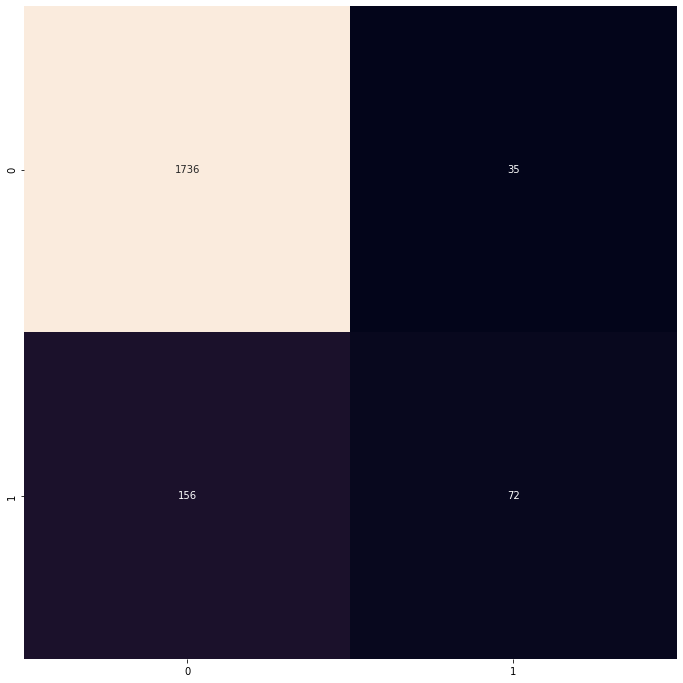

erreur : 9.554777388694347%


In [14]:
predictionX=Logit.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusionX=confusion_matrix(y_test,predictionX)


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
sns.heatmap(confusionX,square=True, fmt='d', cbar=False ,annot=True)
plt.show()

err_logit=(Logit.predict(X_test) != y_test).mean()
print(f"erreur : {err_logit*100}%")

#### Variance et IC

On répère 100 fois tirage + régression et on stock les odds-ratio et le taux d'arreur dans un vecteur (on en met que 10 ici pour plus de simplicité)

In [15]:
simul = 10

resultat=np.zeros((simul,X.shape[1]))
resultat2=np.zeros(simul)
for i in range(simul):
  print(i)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25)
  Logit = LogisticRegression(penalty = "none", max_iter=5000)
  Logit.fit(X_train2,y_train2)
  
  odd=np.exp(Logit.coef_)
  resultat[i,:] = odd
  print(f"erreur = {(Logit.predict(X_test2) != y_test2).mean()}")
  resultat2[i] = (Logit.predict(X_test2) != y_test2).mean()


0


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09504752376188094
1


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09104552276138068
2


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09704852426213106
3


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09254627313656828
4


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09854927463731866
5


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09104552276138068
6


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09304652326163082
7


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.0865432716358179
8


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.09554777388694347
9


LogisticRegression(max_iter=5000, penalty='none')

erreur = 0.0895447723861931


On calcule les moyennes et les intervalles de confiance selon la formule [Xn +/- 1.96 * sqrt(Var)] (TCL)

In [16]:

Xn = np.mean(resultat,0) 
Vn = np.var(resultat,0)
print("\n")
Xn_err = np.mean(resultat2)
Vn_err = np.var(resultat2)
print(f"moyenne des erreurs : {Xn_err}\n variance des erreurs : {Vn_err}")

IC_odd = np.zeros((resultat.shape[1],2))
for i in range(resultat.shape[1]):
  IC_odd[i] = np.array( [ Xn[i] - 1.96*np.sqrt(Vn[i]) , Xn[i] + 1.96*np.sqrt(Vn[i]) ] )

IC_err = 100 * np.array(       [ Xn_err - 1.96*np.sqrt(Vn_err) , Xn_err + 1.96*np.sqrt(Vn_err) ]        )



moyenne des erreurs : 0.09299649824912457
 variance des erreurs : 1.1934431447839987e-05


#### Courbe ROC

(288,)

Text(0.5, 1.0, 'Courbe ROC - classifieur potabilité eau')

Text(0.5, 0, 'TFP')

Text(0, 0.5, 'TVP')

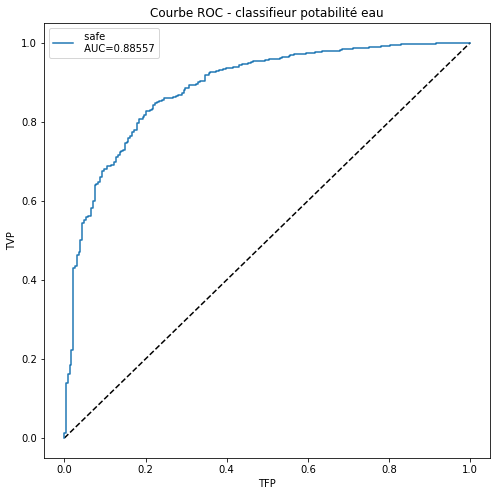

In [17]:
from sklearn.metrics import roc_curve, auc

probas = Logit.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label=Logit.classes_[0])
fpr0.shape

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  # seconde façon
ax.plot(fpr0, tpr0, label= ' safe \n AUC=%1.5f' % aucf)
ax.set_title('Courbe ROC - classifieur potabilité eau')
ax.set_xlabel("TFP")
ax.set_ylabel("TVP")
ax.legend()

## Classification Forêt

### Interprétation

#### Cart

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

       
param = {'max_depth':[23]}    #paramètre obtenu après de nombreux essaies sur des  valeurs de 1 à 50
for_opt = GridSearchCV(RandomForestClassifier(n_estimators=200), param, cv=10)
for_opt.fit(X_train, y_train)
for_opt.best_estimator_  


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [23]})

RandomForestClassifier(max_depth=23, n_estimators=200)

#### Interprétation : Cart

On trace un arbre pour faire l'interprétation

DecisionTreeClassifier(max_depth=23)

<Figure size 864x864 with 0 Axes>

[Text(0.5431034482758621, 0.9, 'X[0] <= 0.385\ngini = 0.202\nsamples = 5997\nvalue = [5313, 684]'),
 Text(0.27586206896551724, 0.7, 'X[0] <= 0.115\ngini = 0.085\nsamples = 4627\nvalue = [4420, 207]'),
 Text(0.13793103448275862, 0.5, 'X[10] <= 0.505\ngini = 0.068\nsamples = 4172\nvalue = [4024, 148]'),
 Text(0.06896551724137931, 0.3, 'X[13] <= 1.005\ngini = 0.102\nsamples = 2303\nvalue = [2179, 124]'),
 Text(0.034482758620689655, 0.1, '\n  (...)  \n'),
 Text(0.10344827586206896, 0.1, '\n  (...)  \n'),
 Text(0.20689655172413793, 0.3, 'X[5] <= 1.215\ngini = 0.025\nsamples = 1869\nvalue = [1845, 24]'),
 Text(0.1724137931034483, 0.1, '\n  (...)  \n'),
 Text(0.2413793103448276, 0.1, '\n  (...)  \n'),
 Text(0.41379310344827586, 0.5, 'X[18] <= 0.095\ngini = 0.226\nsamples = 455\nvalue = [396, 59]'),
 Text(0.3448275862068966, 0.3, 'X[19] <= 0.035\ngini = 0.467\nsamples = 94\nvalue = [59, 35]'),
 Text(0.3103448275862069, 0.1, '\n  (...)  \n'),
 Text(0.3793103448275862, 0.1, '\n  (...)  \n'),
 Te

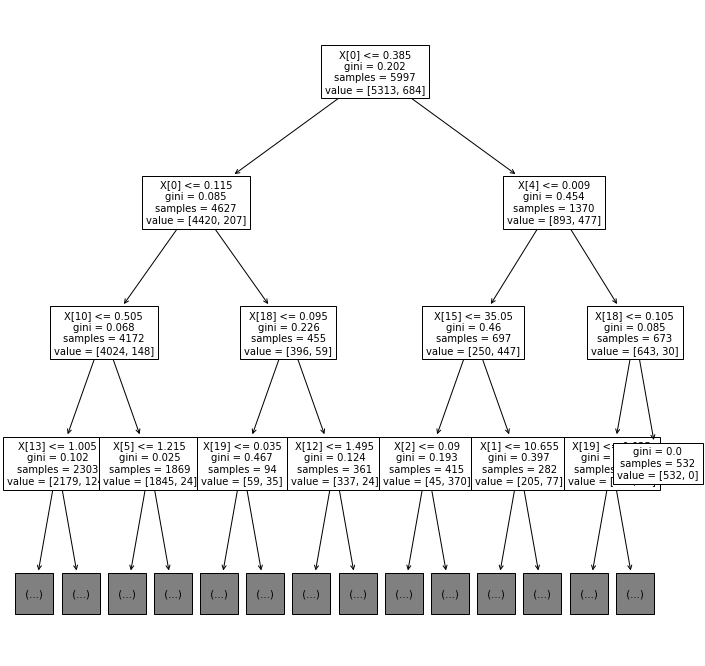

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=23)
tree.fit(X_train, y_train)
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(tree,max_depth=3,fontsize=10)
plt.show()

#### Matrice de confusion

<Figure size 864x864 with 0 Axes>

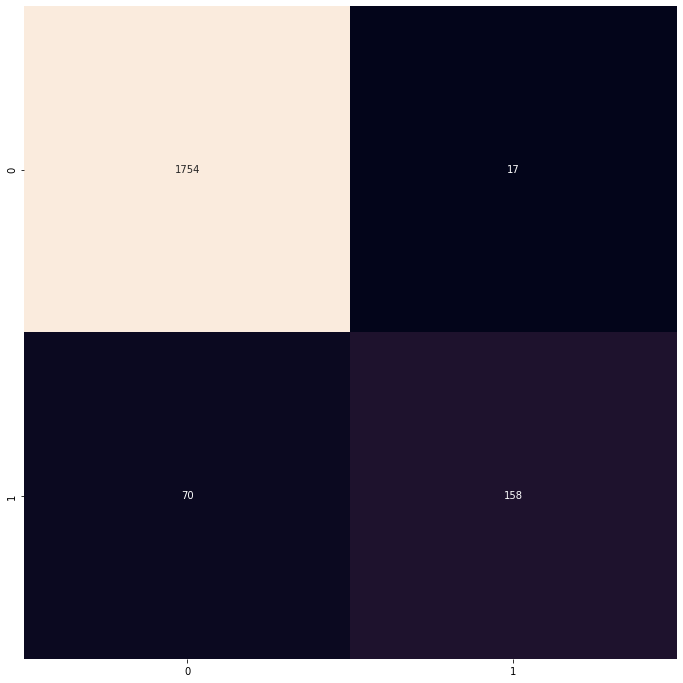

erreur : 4.352176088044022%


In [20]:
predictionX=for_opt.predict(X_test)
confusionX=confusion_matrix(y_test,predictionX)
plt.figure(figsize=(12,12)) 
sns.heatmap(confusionX,square=True, fmt='d', cbar=False ,annot=True)
plt.show()

err_for=(for_opt.predict(X_test) != y_test).mean()
print(f"erreur : {err_for*100}%")


#### Variance et IC

Même procédé que pour la régression logistique

In [21]:
simul = 10

resultat=np.zeros(simul)
for i in range(simul):
  print(i)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25)
  foret = RandomForestClassifier(max_depth=23, n_estimators=200)
  foret.fit(X_train2,y_train2)
  
  print(f"erreur = {(foret.predict(X_test2) != y_test2).mean()}")
  resultat[i] = (foret.predict(X_test2) != y_test2).mean()


0


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04552276138069034
1


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04052026013006503
2


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.03301650825412707
3


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.053526763381690844
4


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04452226113056528
5


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04452226113056528
6


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04402201100550275
7


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.03651825912956478
8


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04902451225612806
9


RandomForestClassifier(max_depth=23, n_estimators=200)

erreur = 0.04302151075537769


In [22]:

Xn_err = np.mean(resultat)
Vn_err = np.var(resultat)

print(f"moyenne des erreurs : {Xn_err}\n variance des erreurs : {Vn_err}")

IC_err = 100 * np.array( [ Xn_err - 1.96*np.sqrt(Vn_err) , Xn_err + 1.96*np.sqrt(Vn_err) ]        )

print("\n")
np.round(IC_err,2)

moyenne des erreurs : 0.04342171085542772
 variance des erreurs : 3.052051288275453e-05




array([3.26, 5.42])

#### Courbe ROC

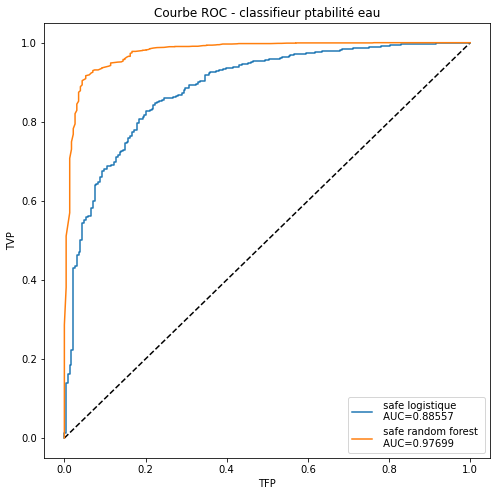

In [23]:
probas = Logit.predict_proba(X_test)
probas2 = for_opt.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label=Logit.classes_[0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas2[:, 0],pos_label=for_opt.classes_[0])
fpr0.shape
fpr1.shape

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  # seconde façon
aucf1 = auc(fpr1, tpr1)
ax.plot(fpr0, tpr0, label= ' safe logistique \n AUC=%1.5f' % aucf)
ax.plot(fpr1, tpr1, label= ' safe random forest \n AUC=%1.5f' % aucf1)
ax.set_title('Courbe ROC - classifieur ptabilité eau')
ax.set_xlabel("TFP")
ax.set_ylabel("TVP");
ax.legend();

## SVM

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SS=StandardScaler().fit(X_train)
Xs_train = SS.transform(X_train)
Xs_test = SS.transform(X_test)

### Optimisation

In [25]:
param_grid = {'C':[90],          
              'gamma': [0.01]}

grid = GridSearchCV(SVC(probability = True), param_grid)
# grid = SVC(C=90, gamma = 0.01, probability = True)
grid.fit(Xs_train,y_train)
grid.best_estimator_

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [90], 'gamma': [0.01]})

SVC(C=90, gamma=0.01, probability=True)

erreur : 5.152576288144072%


<Figure size 864x864 with 0 Axes>

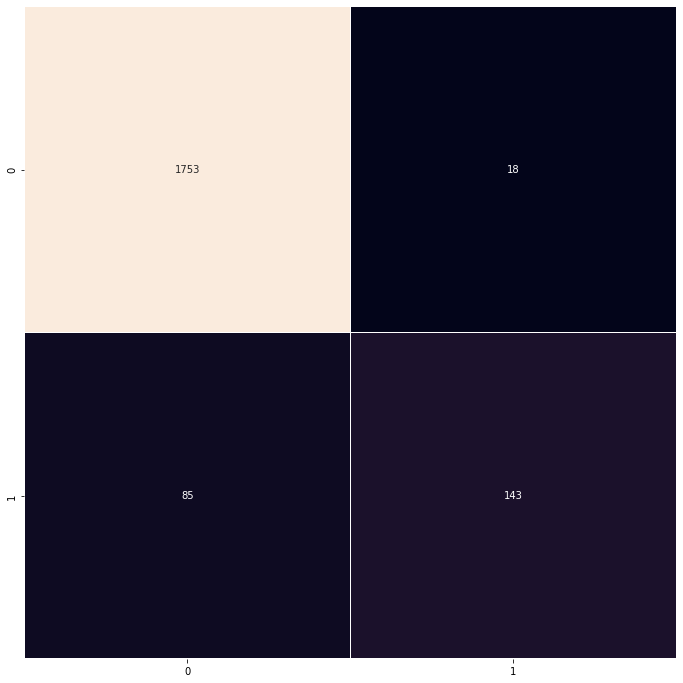

In [26]:
# grid.best_estimator_
err_svc=(grid.predict(Xs_test) != y_test).mean()
print(f"erreur : {err_svc*100}%")
conf_svc = confusion_matrix(y_test, grid.predict(Xs_test))
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
sns.heatmap(conf_svc,square=True, fmt='d', cbar=False ,annot=True,linewidth=.5)
plt.show()

### Courbe ROC

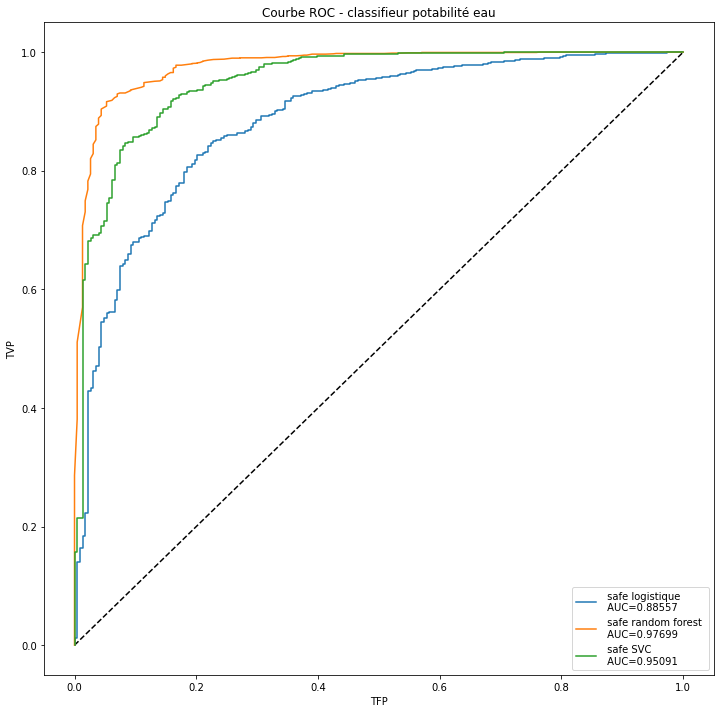

In [27]:
probas = Logit.predict_proba(X_test)
probas2 = for_opt.predict_proba(X_test)
probas3 = grid.predict_proba(Xs_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label=Logit.classes_[0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas2[:, 0],pos_label=for_opt.classes_[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas3[:, 0],pos_label=for_opt.classes_[0])
fpr0.shape
fpr1.shape
fpr2.shape

fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  # seconde façon
aucf1 = auc(fpr1, tpr1)
aucf2 = auc(fpr2, tpr2)
ax.plot(fpr0, tpr0, label= ' safe logistique \n AUC=%1.5f' % aucf)
ax.plot(fpr1, tpr1, label= ' safe random forest \n AUC=%1.5f' % aucf1)
ax.plot(fpr2, tpr2, label= ' safe SVC \n AUC=%1.5f' % aucf2)
ax.set_title('Courbe ROC - classifieur potabilité eau')
ax.set_xlabel("TFP")
ax.set_ylabel("TVP");
ax.legend();

# Super learner

### Construction de la matrice

In [28]:
# on constuit la matrice entièrement et puis on garde les index présents dans l'échantillon test puis dans l'échantillon train

df1=pd.DataFrame(Logit.predict_proba(X),index = X.index, columns = ['1 logit', '0 logit'])
df2=pd.DataFrame(for_opt.predict_proba(X),index = X.index, columns = ['1 forest', '0 forest'])
df3=pd.DataFrame(grid.predict_proba(SS.transform(X)),index = X.index, columns = ['1 SVC', '0 SVC'])

Pred_mat = pd.concat([df1['1 logit'], df2['1 forest'], df3['1 SVC']], axis = 1)
Pred_mat_test = Pred_mat.loc[y_test.index, :]
Pred_mat = Pred_mat.loc[y_train.index, :]

### Régression logistique

In [29]:
super=LogisticRegression(max_iter=5000)
super.fit(Pred_mat,y_train)

LogisticRegression(max_iter=5000)

In [30]:
coef1=np.concatenate((super.intercept_,super.coef_[0]))
var1=Pred_mat.columns.tolist()
var1.insert(0,"intercetp")
df1=pd.DataFrame(coef1).T #['Beta'+str(i) for i in range(0,resultat.shape[1])])

df1.columns=var1

df1.index=["coefs X"]

In [31]:
odds_ratio=pd.DataFrame(np.exp(super.coef_),columns=Pred_mat.columns.tolist())
odds_ratio.index=['odd-ratio']
odds_ratio

,1 logit,1 forest,1 SVC
odd-ratio,1.199307,0.000012,0.110065


### Prédictions

<Figure size 864x864 with 0 Axes>

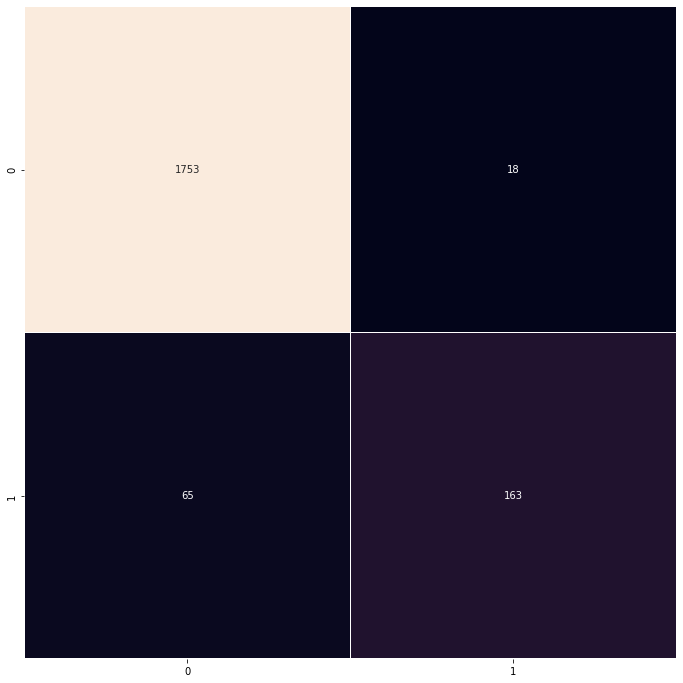

erreur : 4.15207603801901%


In [37]:
predictionX=super.predict(Pred_mat_test)

confusionX=confusion_matrix(y_test,predictionX)
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
sns.heatmap(confusionX,square=True, fmt='d', cbar=False ,annot=True,linewidth=.5)
plt.show()
err_logit=(super.predict(Pred_mat_test) != y_test).mean()
print(f"erreur : {err_logit*100}%")

# Conculsion : comparaison finale

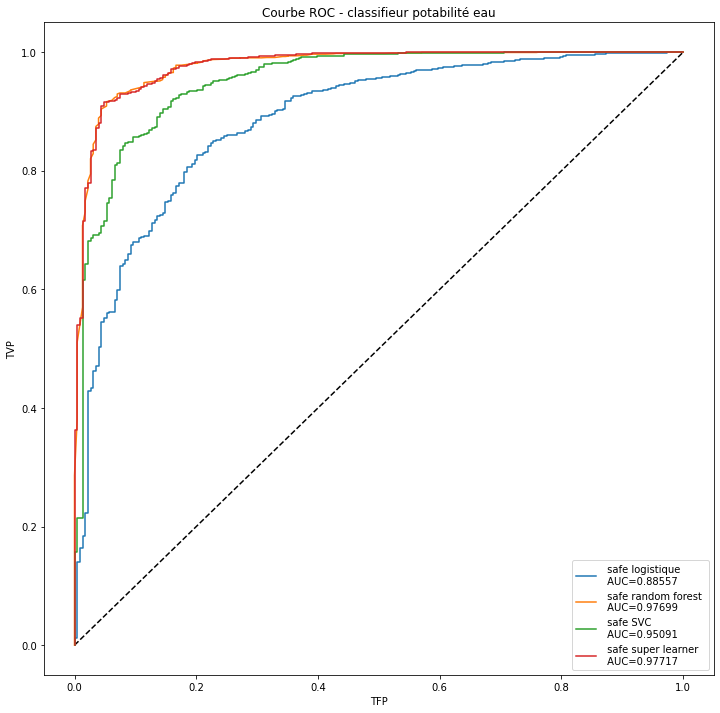

In [33]:
probas = Logit.predict_proba(X_test)
probas2 = for_opt.predict_proba(X_test)
probas3 = grid.predict_proba(Xs_test)
probas4 = super.predict_proba(Pred_mat_test)

fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0],pos_label=Logit.classes_[0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas2[:, 0],pos_label=for_opt.classes_[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas3[:, 0],pos_label=for_opt.classes_[0])
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas4[:, 0],pos_label=for_opt.classes_[0])


fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.plot([0, 1], [0, 1], 'k--')

aucf = auc(fpr0, tpr0)  # seconde façon
aucf1 = auc(fpr1, tpr1)
aucf2 = auc(fpr2, tpr2)
aucf3 = auc(fpr3, tpr3)

ax.plot(fpr0, tpr0, label= ' safe logistique \n AUC=%1.5f' % aucf)
ax.plot(fpr1, tpr1, label= ' safe random forest \n AUC=%1.5f' % aucf1)
ax.plot(fpr2, tpr2, label= ' safe SVC \n AUC=%1.5f' % aucf2)
ax.plot(fpr3, tpr3, label= ' safe super learner \n AUC=%1.5f' % aucf3)

ax.set_title('Courbe ROC - classifieur potabilité eau')
ax.set_xlabel("TFP")
ax.set_ylabel("TVP");
ax.legend();